<a href="https://colab.research.google.com/github/diyar95-max/diyarm95---max.github.io/blob/main/Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1 Upload the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, mean_squared_error,
                            r2_score)

In [2]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


# Step 2: Load and inspect the data  & Data cleaning - handle missing values

In [16]:
import pandas as pd
uploaded_filename = next(iter(uploaded))
df = pd.read_csv(uploaded_filename)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


First 5 rows:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master    

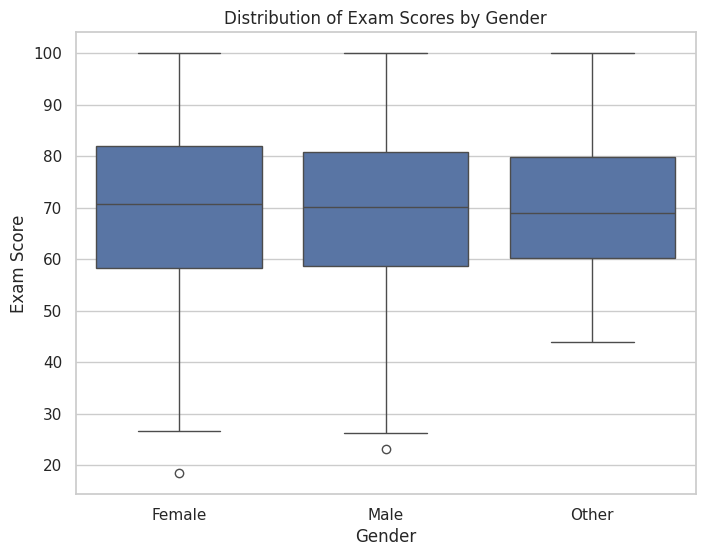

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Box plot: Exam scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title("Distribution of Exam Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.show()

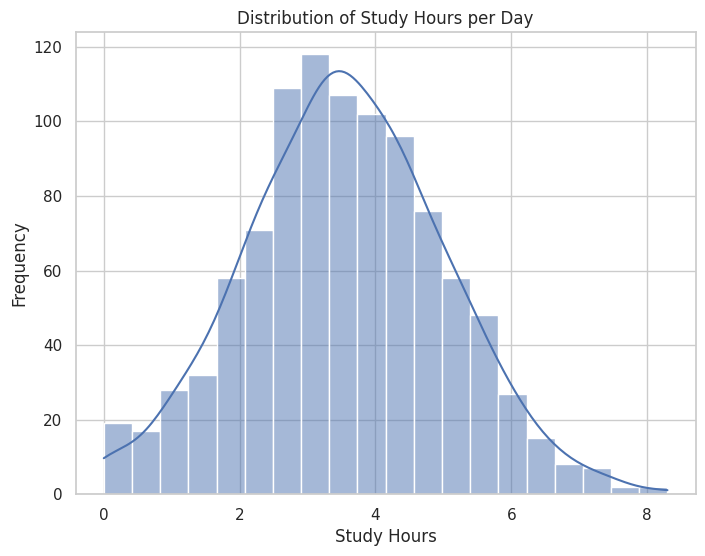

In [44]:
# Histogram: Study hours per day
plt.figure(figsize=(8, 6))
sns.histplot(df['study_hours_per_day'], bins=20, kde=True)
plt.title("Distribution of Study Hours per Day")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()

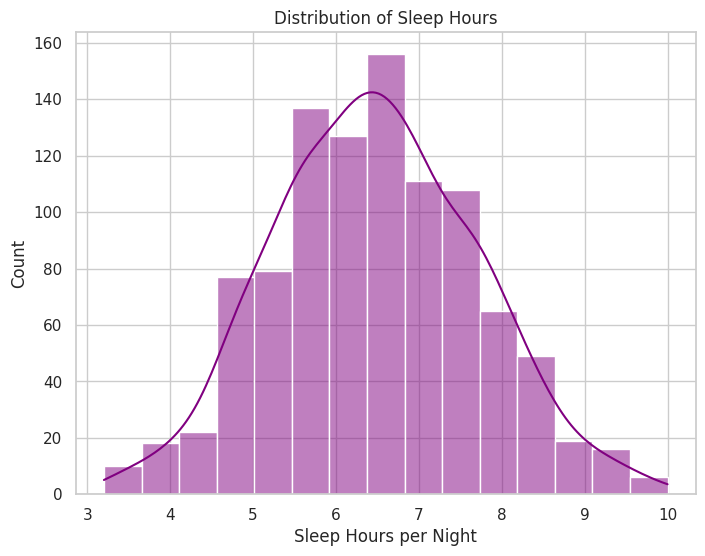

In [45]:
# Histogram for sleep hours
plt.figure(figsize=(8, 6))
sns.histplot(df['sleep_hours'], bins=15, kde=True, color='purple')
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours per Night")
plt.show()

#Step 3 Feature engineering - create target variable

In [19]:
def exam_result(score):
    if score < 40: return 'Fail'
    elif score < 80: return 'Pass'
    else: return 'First_class'

df['students_results'] = df['exam_score'].apply(exam_result)
df['pass_exam'] = (df['exam_score'] >= 60).astype(int)

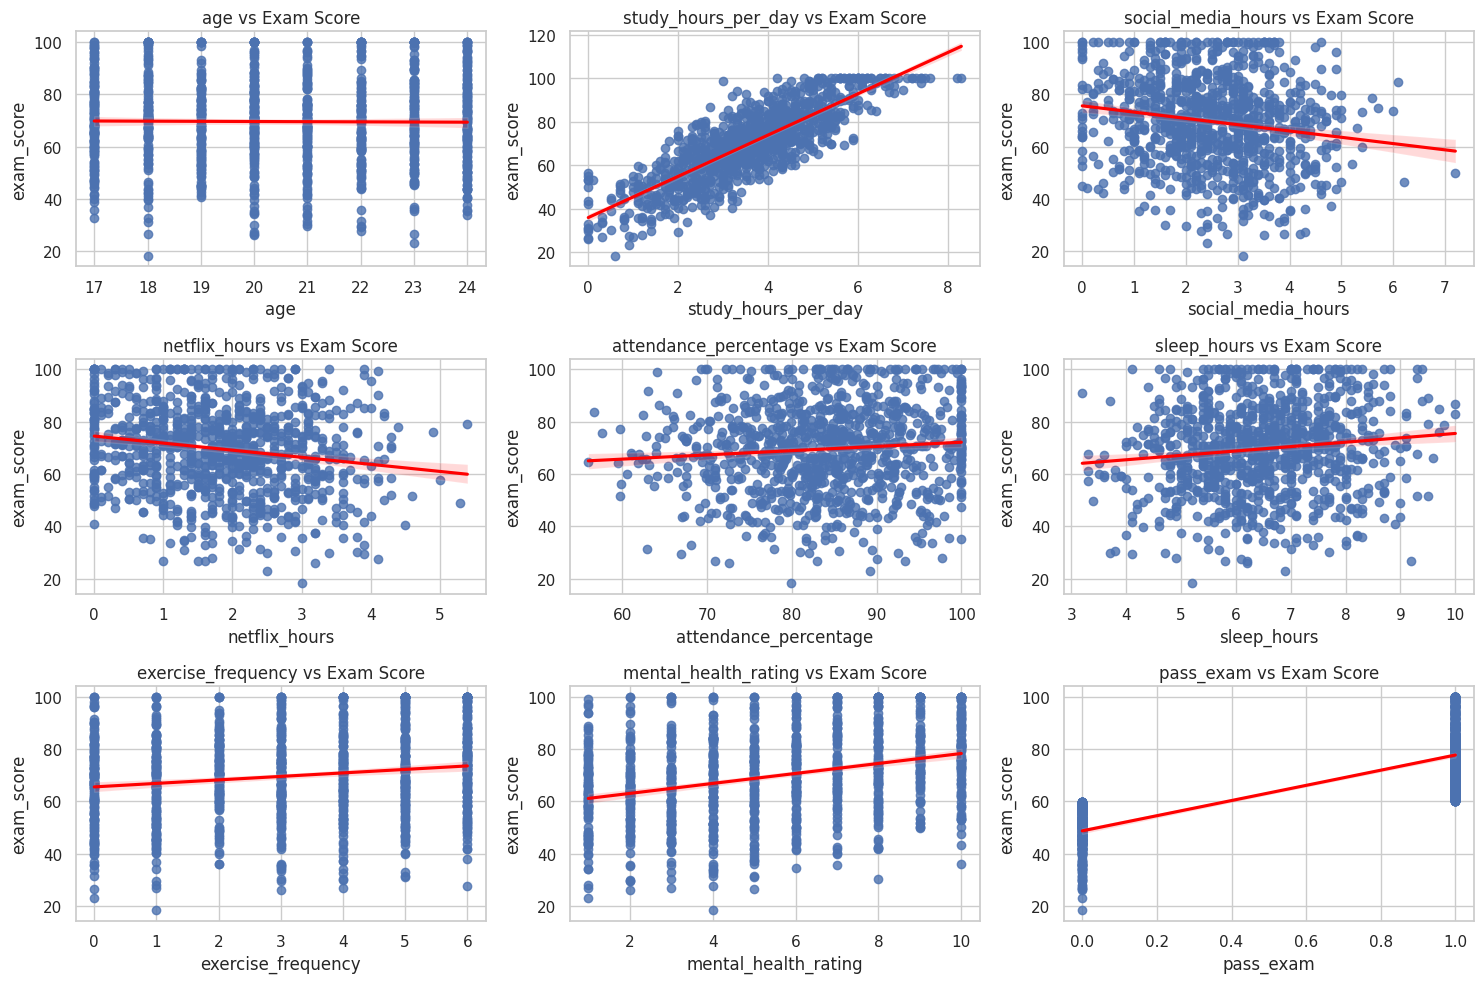

In [20]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'exam_score' in num_cols: num_cols.remove('exam_score')
if 'student_id' in num_cols: num_cols.remove('student_id')

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:9], 1):  # Plot first 9 numerical columns
    plt.subplot(3, 3, i)
    sns.regplot(data=df, x=col, y='exam_score', line_kws={"color": "red"})
    plt.title(f"{col} vs Exam Score")
plt.tight_layout()
plt.show()


# Step 4: Visualize categorical features

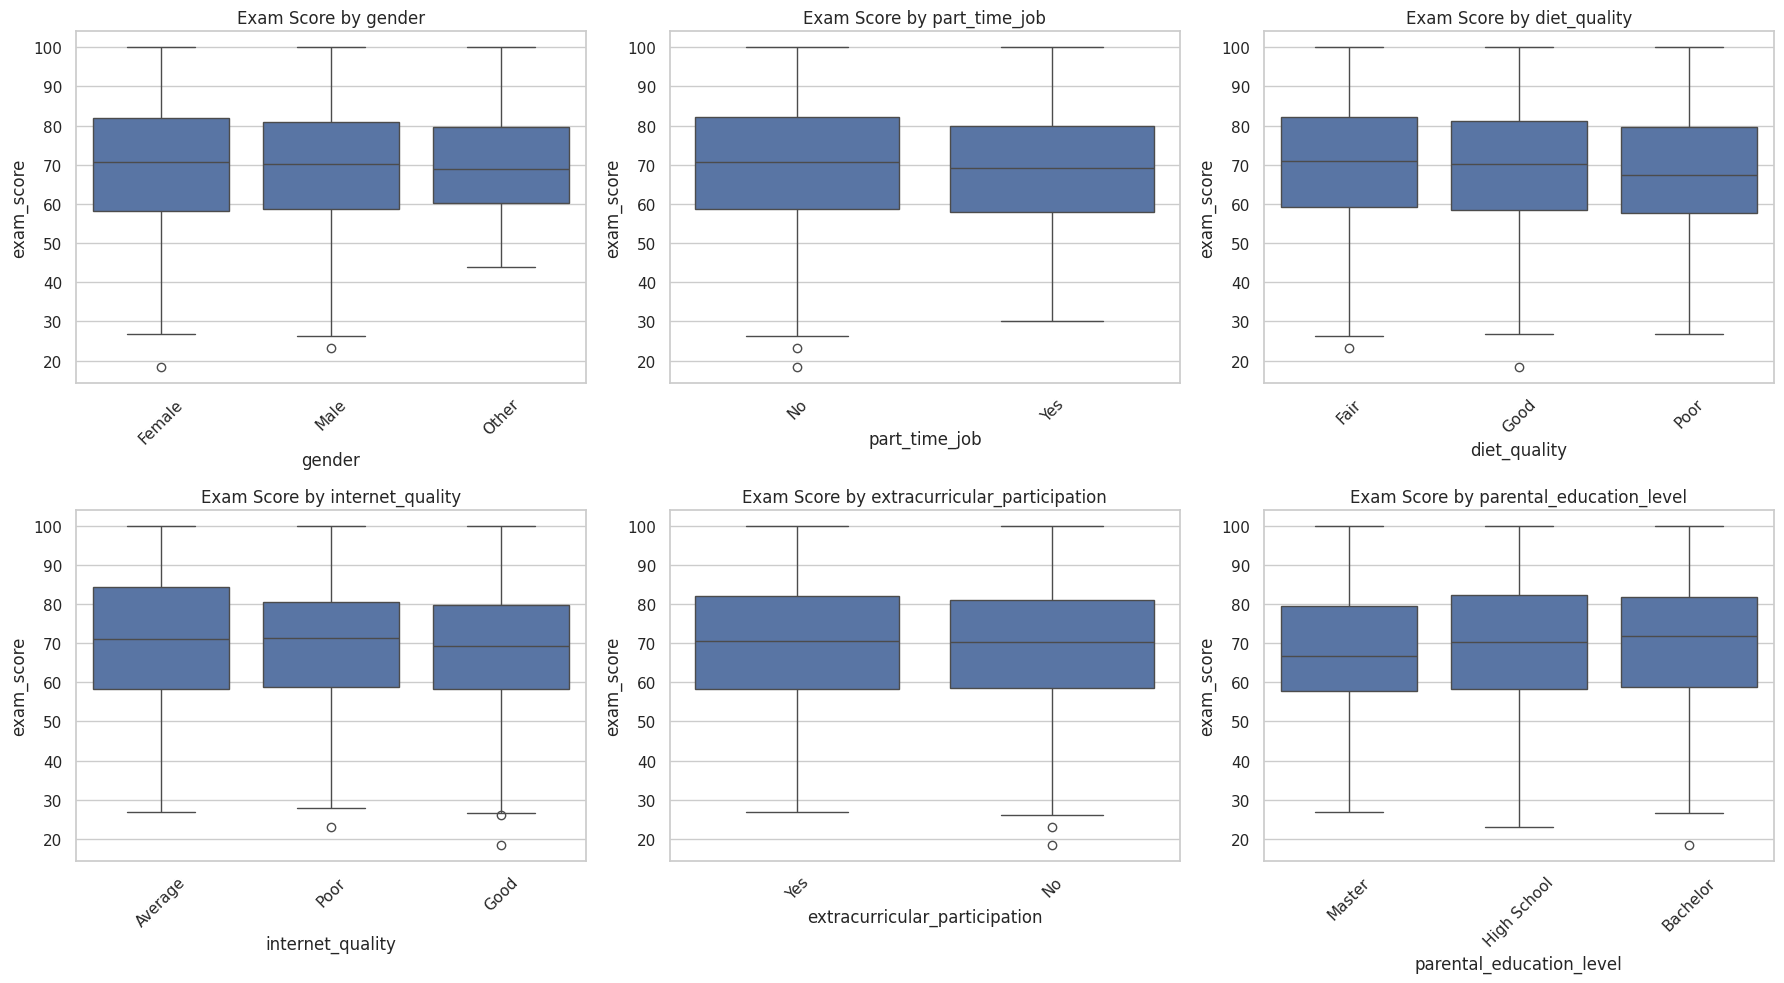

In [21]:
cat_cols = ['gender', 'part_time_job', 'diet_quality',
            'internet_quality', 'extracurricular_participation',
            'parental_education_level']

plt.figure(figsize=(18, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Prepare data for regression (predicting exam score) Encode categorical variables for regression

In [22]:
X_reg = df.drop(['exam_score', 'students_results', 'pass_exam', 'student_id'], axis=1)
y_reg = df['exam_score']


In [23]:
X_reg_encoded = pd.get_dummies(X_reg, drop_first=True)

# Step 6: Split data for regression ,Scale numerical features for regression and Train and evaluate Linear Regression

In [24]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42)


In [25]:
scaler_reg = StandardScaler()
num_cols_reg = [col for col in num_cols if col in X_reg_encoded.columns]
X_train_reg[num_cols_reg] = scaler_reg.fit_transform(X_train_reg[num_cols_reg])
X_test_reg[num_cols_reg] = scaler_reg.transform(X_test_reg[num_cols_reg])


In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
print("\nLinear Regression Performance:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")



Linear Regression Performance:
MSE: 26.53
R2 Score: 0.90


# Step 7: Prepare data for classification (predicting pass/fail) , Encode categorical variables for classification and Split and scale data for classification

In [29]:
features = ['age', 'gender', 'study_hours_per_day', 'social_media_hours',
            'netflix_hours', 'part_time_job', 'attendance_percentage',
            'sleep_hours', 'diet_quality', 'exercise_frequency',
            'parental_education_level', 'internet_quality',
            'mental_health_rating', 'extracurricular_participation']

X_clf = df[features]
y_clf = df['pass_exam']

In [30]:
label_encoders = {}
for col in ['gender', 'part_time_job', 'diet_quality',
            'parental_education_level', 'internet_quality',
            'extracurricular_participation']:
    le = LabelEncoder()
    X_clf[col] = le.fit_transform(X_clf[col])
    label_encoders[col] = le

In [31]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42)

scaler_clf = StandardScaler()
X_train_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_scaled = scaler_clf.transform(X_test_clf)


# Step 8: Train and evaluate Logistic Regression

In [32]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_scaled)

print("\nLogistic Regression Performance:")
print(classification_report(y_test_clf, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_log))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        83
           1       0.97      0.96      0.97       217

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.95      0.95       300

Confusion Matrix:
[[ 77   6]
 [  8 209]]


Mean Squared Error: 26.53253504409944
R-squared Score: 0.8965307156715966


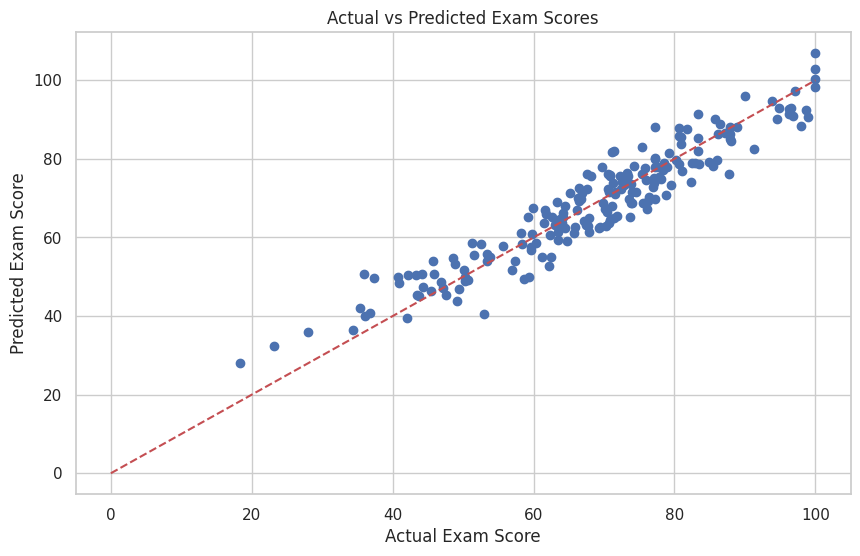

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # Added metrics
import matplotlib.pyplot as plt # Import matplotlib for plotting

lin=LinearRegression()
lin.fit(X_train_reg,y_train_reg) # Corrected to use regression data
y_pred=lin.predict(X_test_reg) # Corrected to use regression data

# Calculate MSE and R^2 score
mse = mean_squared_error(y_test_reg, y_pred)#mean_squared_error # Corrected to use regression data
r2 = r2_score(y_test_reg, y_pred) # Corrected to use regression data

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# ploting linear regression model
plt.scatter(y_test_reg, y_pred) # Corrected to use regression data
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.show()

# Step 9: Train and evaluate Decision Tree Classifier

In [33]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_clf, y_train_clf)  # Decision trees don't need scaling
y_pred_dt = dt_clf.predict(X_test_clf)

print("\nDecision Tree Classifier Performance:")
print(classification_report(y_test_clf, y_pred_dt))


Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        83
           1       0.93      0.91      0.92       217

    accuracy                           0.89       300
   macro avg       0.86      0.87      0.86       300
weighted avg       0.89      0.89      0.89       300



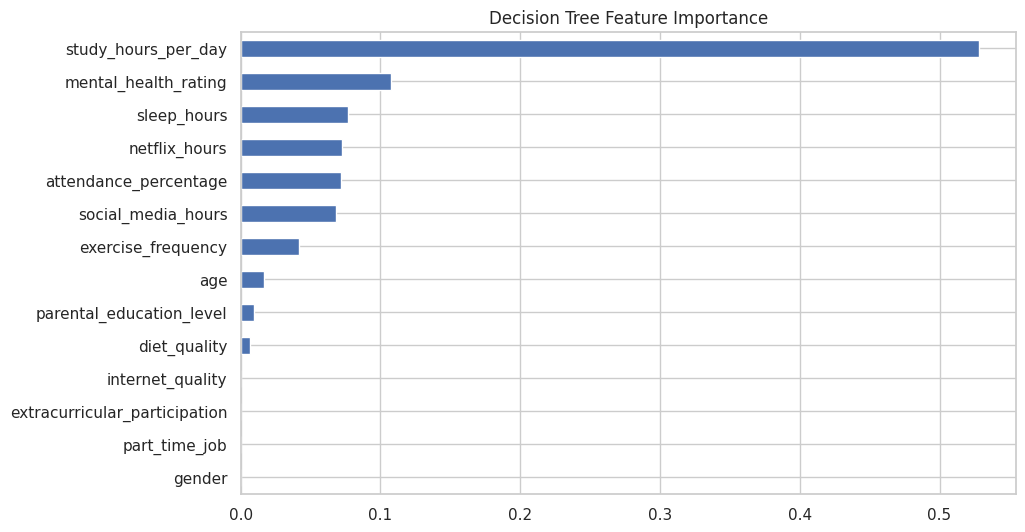

In [34]:
dt_importance = pd.Series(dt_clf.feature_importances_, index=X_clf.columns)
dt_importance.sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.show()

Predictions:
R2 Score: 0.6868317059051003


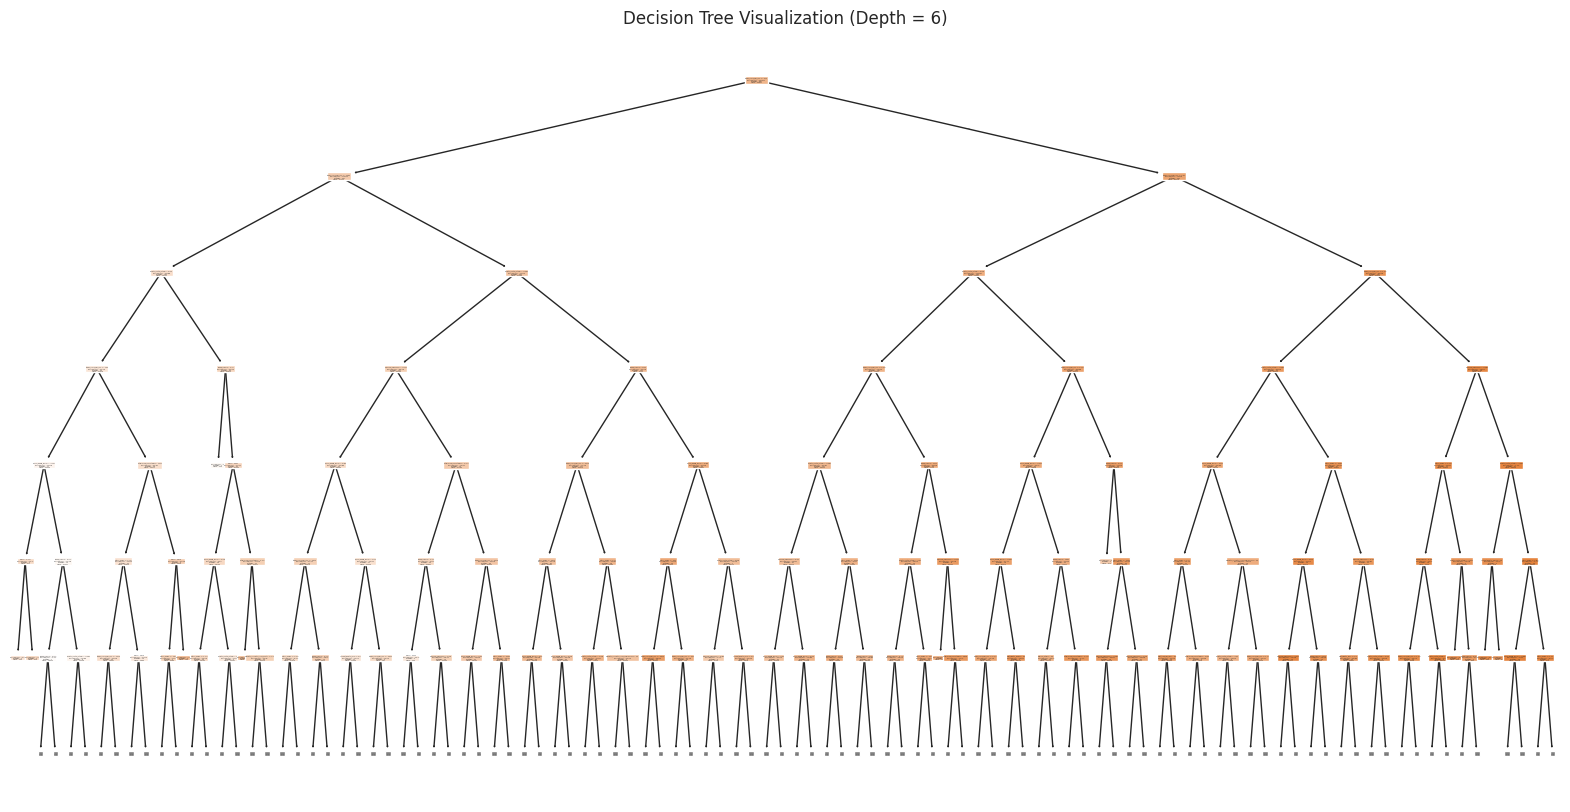

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree

de = DecisionTreeRegressor(max_depth=10, random_state=42)
de.fit(X_train_reg, y_train_reg)
# predicting
de_pred = de.predict(X_test_reg)
# Evaluate
print("Predictions:")
print("R2 Score:", r2_score(y_test_reg, de_pred))

# Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(de, feature_names=X_train_reg.columns, filled=True, max_depth=6)
plt.title("Decision Tree Visualization (Depth = 6)")
plt.show()

# Step 10: Hyperparameter tuning for Logistic Regression

In [35]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_clf)

print("\nBest Logistic Regression Parameters:")
print(grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")


Best Logistic Regression Parameters:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 0.9071


# Step 11: Final model evaluation with best parameters

In [36]:
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test_scaled)

print("\nOptimized Logistic Regression Performance:")
print(classification_report(y_test_clf, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_best))


Optimized Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.96      0.97      0.97       217

    accuracy                           0.95       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

Confusion Matrix:
[[ 75   8]
 [  7 210]]
